# TP 3 - Graph in Machine Learning

## Antonin GAY - MVA 2018-19

### 1 Online SSL for face recognition

For the questions 2.1 and 2.2, the implementation is commented directly in the given code.

The algorithm was then tested on different faces, thanks to the help of my sister and parents, and some results are shown below. The main choices that have been done to get the algorithm working were to use a high variance for the laplacian matrix computation, otherwise the laplacian was the indicator matrix. Then, we got to choose the filter applied to the image before comparing them. To choose it, I used the results obtained in the previous TD, which concluded that the Gaussian and box filters were, for the application on faces, the more efficient.

Finally, the last adaptation that has been done was to normalize the final <i>f</i> values in order to get them inferior (in absolute value) to 1, for lisibility  (if the maximum value was already inferior to 1, we would not change their values).

Eventually, in the next examples (thanks to my sister), we can see that the original dataset had been created in the evening and the results captured in the day, though the algortihm recognised us well anyway. This is logical as the algorithm use gray images for the comparisons.

Faces of Valentine


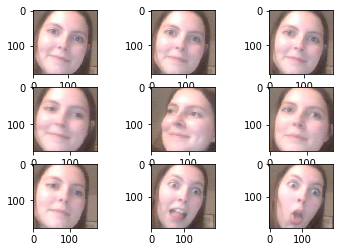

Faces of Antonin


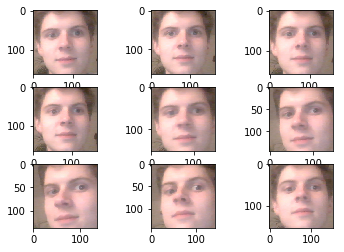

Text(0.5, 1.0, 'Example of face recognition')

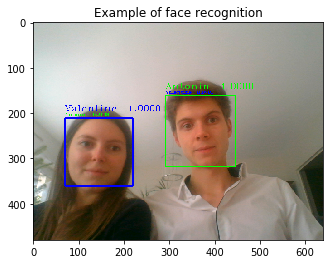

In [11]:
# Todo: add images of the face recognition
%matplotlib inline
import matplotlib.pyplot as plt

def plot_faces(name):
    plt.figure()
    for i in range(9):
        plt.subplot(331 + i)
        im = plt.imread('src/data/faces/' + name + '/img_' + str(i+1) + '.bmp')
        plt.imshow(im)
    plt.show()
    

print('Faces of ''Valentine''')
plot_faces('Valentine')

print('Faces of ''Antonin''')
plot_faces('Antonin')

plt.figure()
im = plt.imread('src/frame-2.png')
plt.imshow(im)
plt.title('Example of face recognition')


Finally, the code was modified to add a funciton to disregard any unknown face, and not recognise it as a known face. To do that, we look at the values of the <i>f</i> vector, which were normalized before. In fact, in the case where a new face were not recognised, the <i>f</i> values would all be low, and no value would be much higher than the other, which is what happens when a face is recognised. Thus, we compared the highest value of <i>f</i> with the second one, and in case of a low difference, we would conclude that the face is not known.

The following pictures illustrate that effect.


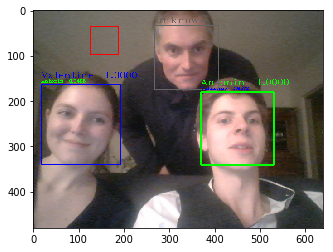

In [12]:
# Todo: add new pictures with 'unknown face'
im = plt.imread('src/frame-1.png')
plt.imshow(im)

### 2 Iterative HFS

In this next part, we will devlopp a new implementation of HFS, using iterative label propagation and a particular matrix form, in order to accelerate the algorithm, especially on huge datasets. In this example, we will use a 15000 edges graph.

To do that, we will start from the harmonic property stating that "the HFS solution wants to satisfy" 
$$f(x_i)=\frac{\sum_{i{\sim}j}{f(x_j)w_{ij}}}{\sum_{i{\sim}j}{w_{ij}}}$$
And we will use a matrix in Compressed Sparse Column format, which allow us to access the matrix column way quicker. Then, we just have to implement the previous property for propagation using operation only on the matrix column.

Hence, at each iteration of the algortihm, we will propagate the labels using the previous equation, until all the edges have a stable label. For that, we simply go through all the edges and apply the formula to get the new value of $f(x_i)$.

Though, when implementing the algorithm, I had to make sure that the edges were browsed randomly. In fact, in the original dataset, The first values are all '1' labels, while the '2' labels are at the end of it. So, if the algorithm went through the edges in the classical order, it would propagate the '1' labels on the most part of the dataset befor ancountering '2' labels, which would then have a limited growth. Thanksfully, randomisation of the exploration solved this problem.

I was hopping to compare the time of computation between iterative and HardHFS in the next code, but my 4Go RAM computer gives me a 'MemoryError' on Python when I try to do HardHFS on the 15000 * 15000 weight matrix. Though, when trying to computing (and inversing the matrix), python take up to 2Go of RAM, which is too much. Thus, only the iterative way is shown. Between iterations, the algorithm plots the number of labels which are 1, 2 or still unlabelled (0) at this step.

In [5]:
from src.Large_Scale_Label_Propagation.iterative_func import iterative_hfs

_, accuracy_it = iterative_hfs(10, "src/data/data_iterative_hfs_graph.mat")

print('The accuracy of the algorithm is finally %f' % accuracy_it)

Iteration #1 over 10:   0%|          | 0/15000 [00:00<?, ?it/s]

Iteration #1 over 10:   2%|▏         | 338/15000 [00:00<00:04, 3348.45it/s]

Iteration #1 over 10:   4%|▍         | 619/15000 [00:00<00:04, 3156.37it/s]

Iteration #1 over 10:   6%|▌         | 933/15000 [00:00<00:04, 3142.51it/s]

Iteration #1 over 10:   8%|▊         | 1246/15000 [00:00<00:04, 3129.88it/s]

Iteration #1 over 10:  11%|█         | 1613/15000 [00:00<00:04, 3266.23it/s]

Iteration #1 over 10:  13%|█▎        | 1901/15000 [00:00<00:04, 3130.22it/s]

Iteration #1 over 10:  15%|█▍        | 2178/15000 [00:00<00:04, 2945.99it/s]

Iteration #1 over 10:  17%|█▋        | 2477/15000 [00:00<00:04, 2950.81it/s]

Iteration #1 over 10:  18%|█▊        | 2756/15000 [00:00<00:04, 2839.23it/s]

Iteration #1 over 10:  20%|██        | 3030/15000 [00:01<00:04, 2515.35it/s]

Iteration #1 over 10:  22%|██▏       | 3281/15000 [00:01<00:04, 2499.20it/s]

Iteration #1 over 10:  24%|██▎       | 3531/15000 [00:01<00:04, 2434.19it/s]

Iteration #1 over 10:  25%|██▌       | 3775/15000 [00:01<00:04, 2414.64it/s]

Iteration #1 over 10:  27%|██▋       | 4055/15000 [00:01<00:04, 2512.25it/s]

Iteration #1 over 10:  29%|██▉       | 4420/15000 [00:01<00:03, 2765.49it/s]

Iteration #1 over 10:  32%|███▏      | 4746/15000 [00:01<00:03, 2890.06it/s]

Iteration #1 over 10:  34%|███▍      | 5116/15000 [00:01<00:03, 3085.76it/s]

Iteration #1 over 10:  36%|███▌      | 5436/15000 [00:01<00:03, 3110.78it/s]

Iteration #1 over 10:  39%|███▉      | 5857/15000 [00:01<00:02, 3367.35it/s]

Iteration #1 over 10:  42%|████▏     | 6261/15000 [00:02<00:02, 3535.82it/s]

Iteration #1 over 10:  44%|████▍     | 6625/15000 [00:02<00:02, 3397.16it/s]

Iteration #1 over 10:  47%|████▋     | 7031/15000 [00:02<00:02, 3563.42it/s]

Iteration #1 over 10:  49%|████▉     | 7395/15000 [00:02<00:02, 3377.15it/s]

Iteration #1 over 10:  52%|█████▏    | 7741/15000 [00:02<00:02, 3267.30it/s]

Iteration #1 over 10:  54%|█████▍    | 8074/15000 [00:02<00:02, 3257.50it/s]

Iteration #1 over 10:  56%|█████▌    | 8404/15000 [00:02<00:02, 3176.32it/s]

Iteration #1 over 10:  58%|█████▊    | 8732/15000 [00:02<00:01, 3197.89it/s]

Iteration #1 over 10:  60%|██████    | 9058/15000 [00:02<00:01, 3207.33it/s]

Iteration #1 over 10:  63%|██████▎   | 9381/15000 [00:03<00:01, 3186.12it/s]

Iteration #1 over 10:  65%|██████▍   | 9701/15000 [00:03<00:01, 3080.28it/s]

Iteration #1 over 10:  67%|██████▋   | 10027/15000 [00:03<00:01, 3123.63it/s]

Iteration #1 over 10:  70%|██████▉   | 10436/15000 [00:03<00:01, 3353.97it/s]

Iteration #1 over 10:  72%|███████▏  | 10778/15000 [00:03<00:01, 3185.80it/s]

Iteration #1 over 10:  74%|███████▍  | 11103/15000 [00:03<00:01, 3017.90it/s]

Iteration #1 over 10:  76%|███████▌  | 11411/15000 [00:03<00:01, 2625.46it/s]

Iteration #1 over 10:  78%|███████▊  | 11687/15000 [00:03<00:01, 2518.99it/s]

Iteration #1 over 10:  80%|███████▉  | 11950/15000 [00:03<00:01, 2536.97it/s]

Iteration #1 over 10:  81%|████████▏ | 12211/15000 [00:04<00:01, 2457.74it/s]

Iteration #1 over 10:  83%|████████▎ | 12463/15000 [00:04<00:01, 2447.65it/s]

Iteration #1 over 10:  85%|████████▍ | 12715/15000 [00:04<00:00, 2462.07it/s]

Iteration #1 over 10:  87%|████████▋ | 13037/15000 [00:04<00:00, 2643.02it/s]

Iteration #1 over 10:  89%|████████▉ | 13314/15000 [00:04<00:00, 2672.58it/s]

Iteration #1 over 10:  91%|█████████ | 13609/15000 [00:04<00:00, 2742.92it/s]

Iteration #1 over 10:  93%|█████████▎| 13887/15000 [00:04<00:00, 2515.32it/s]

Iteration #1 over 10:  94%|█████████▍| 14145/15000 [00:04<00:00, 2455.23it/s]

Iteration #1 over 10:  96%|█████████▌| 14412/15000 [00:04<00:00, 2509.14it/s]

Iteration #1 over 10:  98%|█████████▊| 14774/15000 [00:05<00:00, 2757.70it/s]

Iteration #1 over 10: 100%|██████████| 15000/15000 [00:05<00:00, 2931.94it/s]

#0 = 12492 | #1 = 1025 | #2 = 1483 | acc = 0.598867

Iteration #2 over 10:   0%|          | 0/15000 [00:00<?, ?it/s]

Iteration #2 over 10:   2%|▏         | 341/15000 [00:00<00:04, 3378.06it/s]

Iteration #2 over 10:   5%|▍         | 685/15000 [00:00<00:04, 3386.99it/s]

Iteration #2 over 10:   7%|▋         | 1060/15000 [00:00<00:04, 3479.15it/s]

Iteration #2 over 10:  10%|▉         | 1450/15000 [00:00<00:03, 3586.20it/s]

Iteration #2 over 10:  12%|█▏        | 1796/15000 [00:00<00:03, 3536.92it/s]

Iteration #2 over 10:  15%|█▍        | 2180/15000 [00:00<00:03, 3613.26it/s]

Iteration #2 over 10:  17%|█▋        | 2526/15000 [00:00<00:03, 3555.50it/s]

Iteration #2 over 10:  19%|█▉        | 2915/15000 [00:00<00:03, 3640.00it/s]

Iteration #2 over 10:  22%|██▏       | 3297/15000 [00:00<00:03, 3682.15it/s]

Iteration #2 over 10:  24%|██▍       | 3653/15000 [00:01<00:03, 3579.31it/s]

Iteration #2 over 10:  27%|██▋       | 4003/15000 [00:01<00:03, 3267.18it/s]

Iteration #2 over 10:  29%|██▉       | 4330/15000 [00:01<00:03, 3155.09it/s]

Iteration #2 over 10:  31%|███▏      | 4692/15000 [00:01<00:03, 3272.99it/s]

Iteration #2 over 10:  33%|███▎      | 5021/15000 [00:01<00:03, 3269.03it/s]

Iteration #2 over 10:  36%|███▌      | 5349/15000 [00:01<00:02, 3224.64it/s]

Iteration #2 over 10:  38%|███▊      | 5712/15000 [00:01<00:02, 3327.76it/s]

Iteration #2 over 10:  40%|████      | 6047/15000 [00:01<00:02, 3238.31it/s]

Iteration #2 over 10:  43%|████▎     | 6395/15000 [00:01<00:02, 3298.39it/s]

Iteration #2 over 10:  45%|████▍     | 6727/15000 [00:01<00:02, 3285.79it/s]

Iteration #2 over 10:  47%|████▋     | 7057/15000 [00:02<00:02, 3149.37it/s]

Iteration #2 over 10:  49%|████▉     | 7374/15000 [00:02<00:02, 3128.05it/s]

Iteration #2 over 10:  52%|█████▏    | 7736/15000 [00:02<00:02, 3252.70it/s]

Iteration #2 over 10:  54%|█████▍    | 8067/15000 [00:02<00:02, 3260.60it/s]

Iteration #2 over 10:  56%|█████▌    | 8405/15000 [00:02<00:02, 3286.47it/s]

Iteration #2 over 10:  58%|█████▊    | 8735/15000 [00:02<00:02, 3070.54it/s]

Iteration #2 over 10:  60%|██████    | 9072/15000 [00:02<00:01, 3146.45it/s]

Iteration #2 over 10:  63%|██████▎   | 9431/15000 [00:02<00:01, 3259.18it/s]

Iteration #2 over 10:  65%|██████▌   | 9761/15000 [00:02<00:01, 3195.89it/s]

Iteration #2 over 10:  67%|██████▋   | 10084/15000 [00:03<00:01, 3159.56it/s]

Iteration #2 over 10:  69%|██████▉   | 10402/15000 [00:03<00:01, 3039.19it/s]

Iteration #2 over 10:  72%|███████▏  | 10764/15000 [00:03<00:01, 3184.80it/s]

Iteration #2 over 10:  74%|███████▍  | 11106/15000 [00:03<00:01, 3243.35it/s]

Iteration #2 over 10:  76%|███████▌  | 11433/15000 [00:03<00:01, 3223.03it/s]

Iteration #2 over 10:  78%|███████▊  | 11758/15000 [00:03<00:01, 3049.74it/s]

Iteration #2 over 10:  81%|████████  | 12082/15000 [00:03<00:00, 3096.05it/s]

Iteration #2 over 10:  83%|████████▎ | 12395/15000 [00:03<00:00, 3034.45it/s]

Iteration #2 over 10:  85%|████████▍ | 12701/15000 [00:03<00:00, 2945.97it/s]

Iteration #2 over 10:  87%|████████▋ | 13016/15000 [00:03<00:00, 2996.29it/s]

Iteration #2 over 10:  89%|████████▉ | 13350/15000 [00:04<00:00, 3083.69it/s]

Iteration #2 over 10:  91%|█████████▏| 13697/15000 [00:04<00:00, 3181.95it/s]

Iteration #2 over 10:  94%|█████████▍| 14108/15000 [00:04<00:00, 3405.02it/s]

Iteration #2 over 10:  97%|█████████▋| 14496/15000 [00:04<00:00, 3525.95it/s]

Iteration #2 over 10:  99%|█████████▉| 14856/15000 [00:04<00:00, 3537.99it/s]

Iteration #2 over 10: 100%|██████████| 15000/15000 [00:04<00:00, 3305.86it/s]

#0 = 8327 | #1 = 3022 | #2 = 3651 | acc = 0.743400

Iteration #3 over 10:   0%|          | 0/15000 [00:00<?, ?it/s]

Iteration #3 over 10:   3%|▎         | 391/15000 [00:00<00:03, 3872.84it/s]

Iteration #3 over 10:   5%|▌         | 789/15000 [00:00<00:03, 3893.80it/s]

Iteration #3 over 10:   8%|▊         | 1199/15000 [00:00<00:03, 3942.48it/s]

Iteration #3 over 10:  10%|▉         | 1461/15000 [00:00<00:05, 2354.50it/s]

Iteration #3 over 10:  12%|█▏        | 1811/15000 [00:00<00:05, 2605.34it/s]

Iteration #3 over 10:  14%|█▍        | 2069/15000 [00:00<00:05, 2574.83it/s]

Iteration #3 over 10:  16%|█▋        | 2462/15000 [00:00<00:04, 2866.02it/s]

Iteration #3 over 10:  19%|█▉        | 2867/15000 [00:00<00:03, 3134.52it/s]

Iteration #3 over 10:  22%|██▏       | 3279/15000 [00:01<00:03, 3369.20it/s]

Iteration #3 over 10:  25%|██▍       | 3688/15000 [00:01<00:03, 3548.36it/s]

Iteration #3 over 10:  27%|██▋       | 4082/15000 [00:01<00:02, 3648.04it/s]

Iteration #3 over 10:  30%|██▉       | 4492/15000 [00:01<00:02, 3763.04it/s]

Iteration #3 over 10:  33%|███▎      | 4879/15000 [00:01<00:02, 3783.80it/s]

Iteration #3 over 10:  35%|███▌      | 5289/15000 [00:01<00:02, 3863.32it/s]

Iteration #3 over 10:  38%|███▊      | 5688/15000 [00:01<00:02, 3889.69it/s]

Iteration #3 over 10:  41%|████      | 6092/15000 [00:01<00:02, 3922.82it/s]

Iteration #3 over 10:  43%|████▎     | 6492/15000 [00:01<00:02, 3934.46it/s]

Iteration #3 over 10:  46%|████▌     | 6900/15000 [00:01<00:02, 3966.10it/s]

Iteration #3 over 10:  49%|████▊     | 7302/15000 [00:02<00:01, 3971.00it/s]

Iteration #3 over 10:  51%|█████▏    | 7700/15000 [00:02<00:01, 3962.72it/s]

Iteration #3 over 10:  54%|█████▍    | 8105/15000 [00:02<00:01, 3977.46it/s]

Iteration #3 over 10:  57%|█████▋    | 8509/15000 [00:02<00:01, 3984.64it/s]

Iteration #3 over 10:  59%|█████▉    | 8908/15000 [00:02<00:01, 3939.93it/s]

Iteration #3 over 10:  62%|██████▏   | 9314/15000 [00:02<00:01, 3964.23it/s]

Iteration #3 over 10:  65%|██████▍   | 9713/15000 [00:02<00:01, 3960.80it/s]

Iteration #3 over 10:  67%|██████▋   | 10110/15000 [00:02<00:01, 3940.41it/s]

Iteration #3 over 10:  70%|███████   | 10505/15000 [00:02<00:01, 3818.22it/s]

Iteration #3 over 10:  73%|███████▎  | 10893/15000 [00:02<00:01, 3826.07it/s]

Iteration #3 over 10:  75%|███████▌  | 11277/15000 [00:03<00:00, 3796.83it/s]

Iteration #3 over 10:  78%|███████▊  | 11658/15000 [00:03<00:00, 3789.86it/s]

Iteration #3 over 10:  80%|████████  | 12038/15000 [00:03<00:00, 3782.23it/s]

Iteration #3 over 10:  83%|████████▎ | 12417/15000 [00:03<00:00, 3762.89it/s]

Iteration #3 over 10:  85%|████████▌ | 12801/15000 [00:03<00:00, 3775.15it/s]

Iteration #3 over 10:  88%|████████▊ | 13179/15000 [00:03<00:00, 3765.77it/s]

Iteration #3 over 10:  90%|█████████ | 13558/15000 [00:03<00:00, 3762.42it/s]

Iteration #3 over 10:  93%|█████████▎| 13936/15000 [00:03<00:00, 3757.29it/s]

Iteration #3 over 10:  95%|█████████▌| 14319/15000 [00:03<00:00, 3768.31it/s]

Iteration #3 over 10:  98%|█████████▊| 14696/15000 [00:03<00:00, 3746.80it/s]

Iteration #3 over 10: 100%|██████████| 15000/15000 [00:04<00:00, 3697.59it/s]

#0 = 4839 | #1 = 4790 | #2 = 5371 | acc = 0.858067

Iteration #4 over 10:   0%|          | 0/15000 [00:00<?, ?it/s]

Iteration #4 over 10:   2%|▏         | 335/15000 [00:00<00:04, 3318.80it/s]

Iteration #4 over 10:   5%|▍         | 692/15000 [00:00<00:04, 3381.10it/s]

Iteration #4 over 10:   7%|▋         | 1036/15000 [00:00<00:04, 3389.27it/s]

Iteration #4 over 10:   9%|▉         | 1395/15000 [00:00<00:03, 3437.78it/s]

Iteration #4 over 10:  12%|█▏        | 1752/15000 [00:00<00:03, 3466.87it/s]

Iteration #4 over 10:  14%|█▍        | 2113/15000 [00:00<00:03, 3498.99it/s]

Iteration #4 over 10:  17%|█▋        | 2482/15000 [00:00<00:03, 3544.33it/s]

Iteration #4 over 10:  19%|█▉        | 2841/15000 [00:00<00:03, 3547.96it/s]

Iteration #4 over 10:  21%|██▏       | 3208/15000 [00:00<00:03, 3573.85it/s]

Iteration #4 over 10:  24%|██▍       | 3572/15000 [00:01<00:03, 3583.45it/s]

Iteration #4 over 10:  26%|██▌       | 3922/15000 [00:01<00:03, 3526.36it/s]

Iteration #4 over 10:  29%|██▊       | 4283/15000 [00:01<00:03, 3541.39it/s]

Iteration #4 over 10:  31%|███       | 4633/15000 [00:01<00:03, 3395.82it/s]

Iteration #4 over 10:  33%|███▎      | 4987/15000 [00:01<00:02, 3428.41it/s]

Iteration #4 over 10:  36%|███▌      | 5347/15000 [00:01<00:02, 3468.68it/s]

Iteration #4 over 10:  38%|███▊      | 5714/15000 [00:01<00:02, 3517.17it/s]

Iteration #4 over 10:  40%|████      | 6073/15000 [00:01<00:02, 3529.06it/s]

Iteration #4 over 10:  43%|████▎     | 6426/15000 [00:01<00:02, 3508.92it/s]

Iteration #4 over 10:  45%|████▌     | 6784/15000 [00:01<00:02, 3520.14it/s]

Iteration #4 over 10:  48%|████▊     | 7143/15000 [00:02<00:02, 3530.76it/s]

Iteration #4 over 10:  50%|████▉     | 7497/15000 [00:02<00:02, 3523.79it/s]

Iteration #4 over 10:  52%|█████▏    | 7855/15000 [00:02<00:02, 3530.60it/s]

Iteration #4 over 10:  55%|█████▍    | 8209/15000 [00:02<00:01, 3523.26it/s]

Iteration #4 over 10:  57%|█████▋    | 8563/15000 [00:02<00:01, 3518.36it/s]

Iteration #4 over 10:  59%|█████▉    | 8920/15000 [00:02<00:01, 3523.83it/s]

Iteration #4 over 10:  62%|██████▏   | 9276/15000 [00:02<00:01, 3524.71it/s]

Iteration #4 over 10:  64%|██████▍   | 9629/15000 [00:02<00:01, 3495.70it/s]

Iteration #4 over 10:  67%|██████▋   | 9979/15000 [00:02<00:01, 3476.75it/s]

Iteration #4 over 10:  69%|██████▉   | 10327/15000 [00:02<00:01, 3447.13it/s]

Iteration #4 over 10:  71%|███████   | 10672/15000 [00:03<00:01, 3428.03it/s]

Iteration #4 over 10:  73%|███████▎  | 11019/15000 [00:03<00:01, 3430.90it/s]

Iteration #4 over 10:  76%|███████▌  | 11370/15000 [00:03<00:01, 3444.86it/s]

Iteration #4 over 10:  78%|███████▊  | 11715/15000 [00:03<00:00, 3436.50it/s]

Iteration #4 over 10:  80%|████████  | 12062/15000 [00:03<00:00, 3437.04it/s]

Iteration #4 over 10:  83%|████████▎ | 12408/15000 [00:03<00:00, 3434.03it/s]

Iteration #4 over 10:  85%|████████▌ | 12758/15000 [00:03<00:00, 3443.95it/s]

Iteration #4 over 10:  87%|████████▋ | 13111/15000 [00:03<00:00, 3459.71it/s]

Iteration #4 over 10:  90%|████████▉ | 13462/15000 [00:03<00:00, 3465.16it/s]

Iteration #4 over 10:  92%|█████████▏| 13809/15000 [00:03<00:00, 3446.54it/s]

Iteration #4 over 10:  94%|█████████▍| 14154/15000 [00:04<00:00, 3437.67it/s]

Iteration #4 over 10:  97%|█████████▋| 14498/15000 [00:04<00:00, 3408.52it/s]

Iteration #4 over 10:  99%|█████████▉| 14839/15000 [00:04<00:00, 3349.11it/s]

Iteration #4 over 10: 100%|██████████| 15000/15000 [00:04<00:00, 3473.41it/s]

#0 = 1405 | #1 = 6365 | #2 = 7230 | acc = 0.982000

Iteration #5 over 10:   0%|          | 0/15000 [00:00<?, ?it/s]

Iteration #5 over 10:   2%|▏         | 312/15000 [00:00<00:04, 3090.35it/s]

Iteration #5 over 10:   4%|▍         | 645/15000 [00:00<00:04, 3150.09it/s]

Iteration #5 over 10:   6%|▌         | 927/15000 [00:00<00:04, 3034.10it/s]

Iteration #5 over 10:   8%|▊         | 1212/15000 [00:00<00:04, 2967.54it/s]

Iteration #5 over 10:  10%|█         | 1542/15000 [00:00<00:04, 3052.02it/s]

Iteration #5 over 10:  13%|█▎        | 1877/15000 [00:00<00:04, 3127.43it/s]

Iteration #5 over 10:  15%|█▍        | 2222/15000 [00:00<00:03, 3209.38it/s]

Iteration #5 over 10:  17%|█▋        | 2559/15000 [00:00<00:03, 3247.09it/s]

Iteration #5 over 10:  19%|█▉        | 2902/15000 [00:00<00:03, 3290.74it/s]

Iteration #5 over 10:  22%|██▏       | 3245/15000 [00:01<00:03, 3322.19it/s]

Iteration #5 over 10:  24%|██▍       | 3586/15000 [00:01<00:03, 3338.99it/s]

Iteration #5 over 10:  26%|██▌       | 3927/15000 [00:01<00:03, 3350.64it/s]

Iteration #5 over 10:  28%|██▊       | 4271/15000 [00:01<00:03, 3367.62it/s]

Iteration #5 over 10:  31%|███       | 4606/15000 [00:01<00:03, 3352.60it/s]

Iteration #5 over 10:  33%|███▎      | 4945/15000 [00:01<00:02, 3354.32it/s]

Iteration #5 over 10:  35%|███▌      | 5284/15000 [00:01<00:02, 3355.72it/s]

Iteration #5 over 10:  37%|███▋      | 5620/15000 [00:01<00:02, 3347.37it/s]

Iteration #5 over 10:  40%|███▉      | 5961/15000 [00:01<00:02, 3356.75it/s]

Iteration #5 over 10:  42%|████▏     | 6297/15000 [00:01<00:02, 3338.27it/s]

Iteration #5 over 10:  44%|████▍     | 6635/15000 [00:02<00:02, 3341.13it/s]

Iteration #5 over 10:  46%|████▋     | 6972/15000 [00:02<00:02, 3340.54it/s]

Iteration #5 over 10:  49%|████▊     | 7311/15000 [00:02<00:02, 3345.69it/s]

Iteration #5 over 10:  51%|█████     | 7646/15000 [00:02<00:02, 3337.75it/s]

Iteration #5 over 10:  53%|█████▎    | 7988/15000 [00:02<00:02, 3352.69it/s]

Iteration #5 over 10:  56%|█████▌    | 8330/15000 [00:02<00:01, 3363.23it/s]

Iteration #5 over 10:  58%|█████▊    | 8673/15000 [00:02<00:01, 3373.57it/s]

Iteration #5 over 10:  60%|██████    | 9012/15000 [00:02<00:01, 3368.80it/s]

Iteration #5 over 10:  62%|██████▏   | 9356/15000 [00:02<00:01, 3380.64it/s]

Iteration #5 over 10:  65%|██████▍   | 9695/15000 [00:02<00:01, 3373.72it/s]

Iteration #5 over 10:  67%|██████▋   | 10033/15000 [00:03<00:01, 3366.30it/s]

Iteration #5 over 10:  69%|██████▉   | 10370/15000 [00:03<00:01, 3357.73it/s]

Iteration #5 over 10:  71%|███████▏  | 10707/15000 [00:03<00:01, 3352.14it/s]

Iteration #5 over 10:  74%|███████▎  | 11050/15000 [00:03<00:01, 3365.77it/s]

Iteration #5 over 10:  76%|███████▌  | 11391/15000 [00:03<00:01, 3369.28it/s]

Iteration #5 over 10:  78%|███████▊  | 11734/15000 [00:03<00:00, 3378.02it/s]

Iteration #5 over 10:  80%|████████  | 12075/15000 [00:03<00:00, 3377.89it/s]

Iteration #5 over 10:  83%|████████▎ | 12421/15000 [00:03<00:00, 3392.88it/s]

Iteration #5 over 10:  85%|████████▌ | 12761/15000 [00:03<00:00, 3385.46it/s]

Iteration #5 over 10:  87%|████████▋ | 13100/15000 [00:03<00:00, 3357.22it/s]

Iteration #5 over 10:  90%|████████▉ | 13443/15000 [00:04<00:00, 3369.15it/s]

Iteration #5 over 10:  92%|█████████▏| 13787/15000 [00:04<00:00, 3380.86it/s]

Iteration #5 over 10:  94%|█████████▍| 14126/15000 [00:04<00:00, 3374.10it/s]

Iteration #5 over 10:  96%|█████████▋| 14464/15000 [00:04<00:00, 3366.34it/s]

Iteration #5 over 10:  99%|█████████▊| 14809/15000 [00:04<00:00, 3381.44it/s]

Iteration #5 over 10: 100%|██████████| 15000/15000 [00:04<00:00, 3330.79it/s]

#0 = 0 | #1 = 7500 | #2 = 7500 | acc = 1.000000

The accuracy of the algorithm is finally 1.000000

#### 3.2

In order to add regularization to our iterative HFS, we could normalize each column of the weight matrix independently, by dividing by the total sum of the column values for example. Anyhow, as the iterative algorithm never see the matrix as a whole, it could not regularize it globally, thus only column-based operations are possible.